In [34]:
#get libaries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [243]:
#data files
mouse_path_csv = './Resources/Mouse_metadata.csv'
study_results_csv = './Resources/Study_results.csv'


#dataframes
mouse_metadata_df = pd.read_csv(mouse_path_csv)
study_results_df = pd.read_csv(study_results_csv)

#merge the dataframes together on Mouse ID
merged_df = pd.merge(study_results_df, mouse_metadata_df, how='left', on=['Mouse ID', 'Mouse ID'])



<p>Remove duplicate mouse ID timepoint values</p>

In [95]:
#cleaning out duplicate values from merged dataframe
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()

clean_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice)]

clean_df['Mouse ID'].nunique()

248

<p>Summary Stats using Pandas Series passed into a dataframe</p>

In [96]:
drug_df = clean_df.groupby('Drug Regimen')

mean_tumor_volume = drug_df['Tumor Volume (mm3)'].mean()

median_tumor_volume = drug_df['Tumor Volume (mm3)'].median()

var_tumor_volume = drug_df['Tumor Volume (mm3)'].var()

std_tumor_volume = drug_df['Tumor Volume (mm3)'].std()

sem_tumor_volume = drug_df['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':var_tumor_volume,
    'Tumor Volume Std. Dev.':std_tumor_volume,
    'Tumor Volume Std. Err.':sem_tumor_volume
})

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<p>Summary Stats using .aggregate method from Pandas</p>

In [45]:
#agg_summary_stats = drug_df['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

#agg_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts
---

### Observed Mice Timepoints per Drug Regimen

<Axes: title={'center': '# of Observed Mice Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mice Timepoints'>

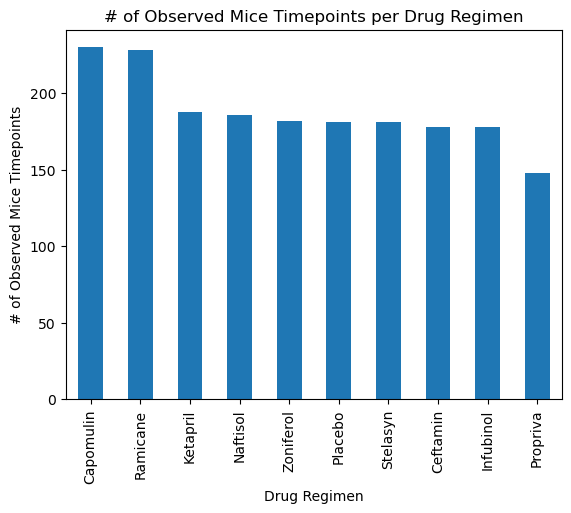

In [98]:

#Bar Chart Plot using Pandas
drug_df['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar', 
                                                              title='# of Observed Mice Timepoints per Drug Regimen',
                                                              xlabel='Drug Regimen',
                                                              ylabel='# of Observed Mice Timepoints')


Text(0.5, 1.0, '# of Observed Mice Timepoints per Drug Regimen')

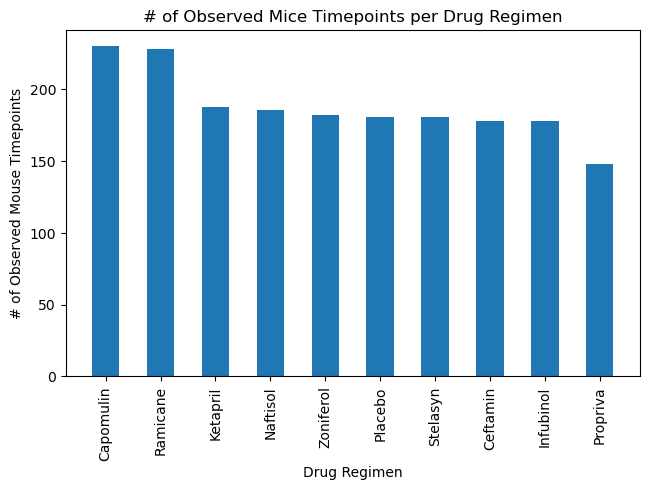

In [103]:
#Bar Chart plot using MatPlotLib PyPlots
mouse_counts = drug_df['Mouse ID'].count()

mouse_counts = mouse_counts.sort_values(ascending=False)


plt.bar(np.arange(0,len(mouse_counts),1),mouse_counts, width=.5)
plt.xticks(ticks=np.arange(0,len(mouse_counts),1),labels=mouse_counts.index,rotation=90)
plt.xlabel('Drug Regimen')
plt.tight_layout()
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('# of Observed Mice Timepoints per Drug Regimen')




## Mouse Gender 
<p> I want to note, if you calculate with the duplicate mouse ID you get the Pie chart in the Starter Code, if you exclude that record, you get the following</p>

#### Pandas Pie Chart 
---

<Axes: title={'center': 'Male vs Female Among Trial mice'}, ylabel='count'>

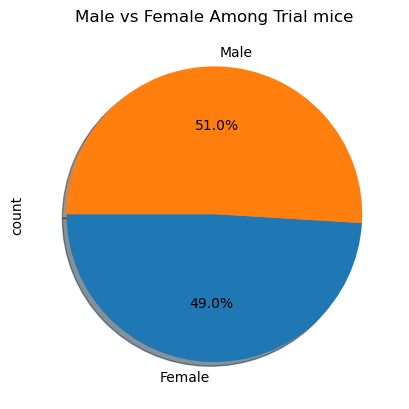

In [169]:
#Create a series of the type of gender and the unique count of Mouse ID per gender

#the commented code below will give you the same percentages as the starter code,
# if that is what you are looking for, my results exclude the duplicate Mouse ID found in the steps above
#mouse_gender = merged_df.groupby('Sex)

#create groupby series
mouse_gender = clean_df.groupby('Sex')

#plot as a pie chart
mouse_gender['Mouse ID'].count().plot(kind='pie',shadow=True, autopct="%1.1f%%", title='Male vs Female Among Trial mice', startangle=180,ylabel='count')





#### MatPlotLib Pie Chart
---

Text(0, 0.5, 'count')

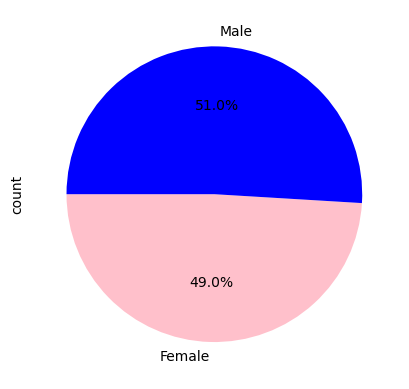

In [176]:
fig,ax = plt.subplots()

#labels for the pie chart is the groupby series index
labels = mouse_gender['Mouse ID'].count().index

#plot pie chart added some extra colors for fun
plt.pie(mouse_gender['Mouse ID'].count(), autopct="%1.1f%%", labels=labels, startangle=180, colors=['pink','blue'])
ax.set_ylabel('count')

In [268]:
#Group by Mouse ID and return the maximum timepoint for that ID
tumor_volume_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint':'max_timepoint'})

#merge with original dataframe
tumor_volume_df = pd.merge(clean_df,tumor_volume_timepoint_df,on='Mouse ID')






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

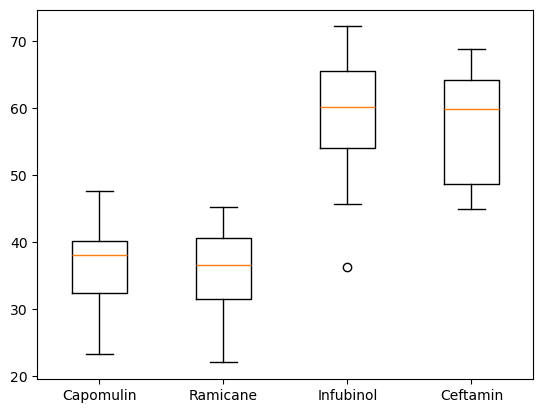

In [272]:
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
values = []



for drug in drugs:
    current_drug = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == drug]
    
    final_tp = current_drug.loc[current_drug['Timepoint'] == current_drug['max_timepoint']]
    
    cur_vals = final_tp['Tumor Volume (mm3)']
        
    values.append(cur_vals)
      
    quartiles = cur_vals.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    


fig1,ax1 = plt.subplots()
ax1.boxplot(values)
ax1.set_xticklabels(drugs)


